# Introduction

In This project aims to leverage data containing information on existing solar power projects within the target area. Through the analysis of this data, our goal is to group(cluster) geographical areas based on their overall energy production.

# Imported Required Libiaries

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_columns', None)

# Load the Data set

In [6]:
#Load the Data set
df = pd.read_csv("C:\\Users\\ragul\\project\\Statewide Solar Projects.csv")

In [7]:
df

Data Through Date Project ID Interconnection Date Utility  \
0             12/31/2023  SDG-66301           12/29/2023  Con Ed   
1             12/31/2023  SDG-66299           12/29/2023  Con Ed   
2             12/31/2023  SDG-66288           12/29/2023  Con Ed   
3             12/31/2023  SDG-66284           12/29/2023  Con Ed   
4             12/31/2023  SDG-66277           12/28/2023  Con Ed   
...                  ...        ...                  ...     ...   
218110        12/31/2023       49.0           12/19/2002     RGE   
218111        12/31/2023       48.0            9/24/2002     RGE   
218112        12/31/2023        NaN             7/1/2018  PSEGLI   
218113        12/31/2023        NaN             3/3/2018  PSEGLI   
218114        12/31/2023        NaN            11/1/2011  PSEGLI   

                  City/Town    County      Zip  Division  \
0             Richmond Hill    Queens  11418.0   CENY-BK   
1                     Bronx     Bronx  10473.0   CENY-BX   
2                  Brooklyn     Kings  11225.0   CENY-BK   
3                  Brooklyn     Kings  11236.0   CENY-BK   
4       Springfield Gardens    Queens  11413.0    CENY-Q   
...                     ...       ...      ...       ...   
218110              Ontario     Wayne  14519.0     Sodus   
218111           Friendship  Allegany  14739.0  Fillmore   
218112                  NaN   Suffolk  11786.0       NaN   
218113                  NaN   Suffolk  11933.0       NaN   
218114                  NaN   Suffolk  11973.0       NaN   

                           Substation  Circuit ID                Developer  \
0                       Brownsville_2        9B05  Kamtech Solar Solutions   
1                       Parkchester_2        5X67  Kamtech Solar Solutions   
2                       Bensonhurst_2        4B08                    SUNCO   
3                       Bensonhurst_2        3037  Kamtech Solar Solutions   
4                             Jamaica        9112  Kamtech Solar Solutions   
...                               ...         ...                      ...   
218110        0205LS0237-1589 RTE 104  0205LS0237                      NaN   
218111  8333GV7702-Friendship Nile RD  8333GV7702                      NaN   
218112                            NaN         NaN                      NaN   
218113                            NaN         NaN                      NaN   
218114                            NaN         NaN                      NaN   

       Metering Method  Estimated PV System Size (kWdc)  \
0                   NM                             6.05   
1                   NM                             6.74   
2                   NM                             3.05   
3                   NM                             5.62   
4                   NM                             6.05   
...                ...                              ...   
218110              NM                             2.81   
218111              NM                             2.93   
218112             FIT                         34362.00   
218113             FIT                         27600.00   
218114             FIT                         43470.00   

        PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
0                        5.17                                         7100   
1                        5.76                                         7911   
2                        2.61                                         3585   
3                        4.80                                         6592   
4                        5.17                                         7100   
...                       ...                                          ...   
218110                   2.40                                         3296   
218111                   2.50                                         3433   
218112               24900.00                                     40335490   
218113               20000.00              

# Data Profilling

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [15]:
df.describe().T

count          mean  \
Zip                                          218019.0  11751.734473   
Estimated PV System Size (kWdc)              218115.0     24.507977   
PV System Size (kWac)                        218115.0     19.065451   
Estimated Annual PV Energy Production (kWh)  218115.0  28768.278592   
Energy Storage System Size (kWac)              4091.0     32.174727   
Number of Projects                           218115.0      1.000000   

                                                       std       min  \
Zip                                             962.129108  10001.00   
Estimated PV System Size (kWdc)                 291.525394      0.01   
PV System Size (kWac)                           211.419642      0.01   
Estimated Annual PV Energy Production (kWh)  342204.175266     14.00   
Energy Storage System Size (kWac)               296.161116      0.35   
Number of Projects                                0.000000      1.00   

                                                  25%       50%       75%  \
Zip                                          11220.00  11717.00  12018.00   
Estimated PV System Size (kWdc)                  5.27      7.13     10.24   
PV System Size (kWac)                            4.50      6.09      8.75   
Estimated Annual PV Energy Production (kWh)   6180.00   8364.00  12017.00   
Energy Storage System Size (kWac)                5.00      7.60     10.00   
Number of Projects                               1.00      1.00      1.00   

                                                    max  
Zip                                             14905.0  
Estimated PV System Size (kWdc)                 43470.0  
PV System Size (kWac)                           31500.0  
Estimated Annual PV Energy Production (kWh)  51026825.0  
Energy Storage System Size (kWac)                5000.0  
Number of Projects                                  1.0

In [17]:
df.nunique()

Data Through Date                                   1
Project ID                                     218077
Interconnection Date                             5411
Utility                                             7
City/Town                                        3009
County                                             62
Zip                                              1729
Division                                          109
Substation                                       2255
Circuit ID                                       6429
Developer                                        2567
Metering Method                                     6
Estimated PV System Size (kWdc)                  3191
PV System Size (kWac)                            3095
Estimated Annual PV Energy Production (kWh)      3769
Energy Storage System Size (kWac)                 210
Number of Projects                                  1
dtype: int64

In [19]:
df.describe(include='object').T

count  unique            top    freq
Data Through Date     218115       1     12/31/2023  218115
Project ID            218112  218077      LDG-00037       2
Interconnection Date  218115    5411      2/11/2016     313
Utility               218115       7         PSEGLI   85110
City/Town             218057    3009  STATEN ISLAND    6884
County                218115      62        Suffolk   51715
Division              132881     109         CENY-Q   21813
Substation            138171    2255        Jamaica   11581
Circuit ID            218085    6429         JA NWK    1015
Developer             207565    2567   Vivint Solar   12822
Metering Method       217652       6             NM  215192

# Exploaring Data Analysis

EDA allows us to gain a comprehensive overview of the data's structure, uncover potential patterns, and identify key trends. Throughout the EDA process, we will analyze the distribution of individual features, investigate correlations, and explore any inherent relationships between variable.Visualizations will play a crucial role in providing a clear representation of the data, offering insights into customer behavior and identifying the factors that may contribute Cancelation predection.

1) Data Through Date: This is the date up to which the data in the dataset is current. It indicates the last date when the information was updated or collected.

2) Interconnection Date: The date when the solar power project was connected to the grid or the utility network for electricity distribution. This date marks the start of the project's operation and energy production.

3) Utility: The utility company or grid operator that provides electricity services to the area where the solar power project is located. It may include both public and private utility companies.

4)  City/Town: This indicates the city or town where the solar power project is located. It provides information about the project's geographical location.

5)  County: This indicates the county where the solar power project is located. It provides additional geographical information, usually for administrative or jurisdictional purposes.

6)  Zip: This is the ZIP code of the location where the solar power project is situated. It provides a more specific geographic reference compared to city/town and county.

7)  Division: This could refer to a division or administrative region within a utility company's service area. It may help in organizing and managing data for utility operations.

8)  Substation: This refers to the electrical substation to which the solar power project is connected. Substations are key components of the electric grid infrastructure, where voltage is transformed and controlled.

9)  Metering Method: This indicates the method used for metering the electricity generated by the solar power project. It could be net metering, feed-in tariff, time-of-use metering, etc.

10) Estimated Annual PV Energy Production (kWh): This is the estimated amount of electricity that the PV system is expected to generate over the course of a year, measured in kilowatt-hours (kWh). It provides an indication of the system's energy output and potential revenue generation.

11) PV System Size (kWac): This is the actual size of the PV system installed at the project site, measured in kilowatts alternating current (kWac). It represents the power output of the solar panels after accounting for inverter efficiency and other system losses.

12) Energy Storage System Size (kWac): If applicable, this is the size of the energy storage system (e.g., batteries) installed at the project site, measured in kilowatts alternating current (kWac). It represents the power capacity of the storage system.

13)  Number of Projects: This indicates the number of individual solar power projects included in the dataset. It provides information about the dataset's scope and scale.

14) Developer: This is the name of the company or entity responsible for developing the solar power project. It provides insight into project ownership and may be relevant for tracking industry trends and market players.





#### Difference in Metering methods

1) NM and RNM: Target primarily individual residential customers and small businesses. These installations are sized to meet the specific needs of these smaller-scale consumers.

2) CDG and RC: Cater to a broader customer base, including residential, commercial, and industrial users. Systems are generally larger to provide shared benefits and meet the needs of multiple users.

3) FIT and RFP: Often target larger commercial or utility-scale projects. These markets are incentivized to maximize production and thus favor larger installations.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [28]:
# check the first 5 rows
df.head(5)

Data Through Date Project ID Interconnection Date Utility  \
0        12/31/2023  SDG-66301           12/29/2023  Con Ed   
1        12/31/2023  SDG-66299           12/29/2023  Con Ed   
2        12/31/2023  SDG-66288           12/29/2023  Con Ed   
3        12/31/2023  SDG-66284           12/29/2023  Con Ed   
4        12/31/2023  SDG-66277           12/28/2023  Con Ed   

             City/Town  County      Zip Division     Substation Circuit ID  \
0        Richmond Hill  Queens  11418.0  CENY-BK  Brownsville_2       9B05   
1                Bronx   Bronx  10473.0  CENY-BX  Parkchester_2       5X67   
2             Brooklyn   Kings  11225.0  CENY-BK  Bensonhurst_2       4B08   
3             Brooklyn   Kings  11236.0  CENY-BK  Bensonhurst_2       3037   
4  Springfield Gardens  Queens  11413.0   CENY-Q        Jamaica       9112   

                 Developer Metering Method  Estimated PV System Size (kWdc)  \
0  Kamtech Solar Solutions              NM                             6.05   
1  Kamtech Solar Solutions              NM                             6.74   
2                    SUNCO              NM                             3.05   
3  Kamtech Solar Solutions              NM                             5.62   
4  Kamtech Solar Solutions              NM                             6.05   

   PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
0                   5.17                                         7100   
1                   5.76                                         7911   
2                   2.61                                         3585   
3                   4.80                                         6592   
4                   5.17                                         7100   

   Energy Storage System Size (kWac)  Number of Projects  
0                                NaN                   1  
1                                NaN                   1  
2                                NaN                   1  
3                                NaN                   1  
4                                NaN                   1

In [30]:
# check the last 5 rows
df.tail(5)

Data Through Date Project ID Interconnection Date Utility   City/Town  \
218110        12/31/2023       49.0           12/19/2002     RGE     Ontario   
218111        12/31/2023       48.0            9/24/2002     RGE  Friendship   
218112        12/31/2023        NaN             7/1/2018  PSEGLI         NaN   
218113        12/31/2023        NaN             3/3/2018  PSEGLI         NaN   
218114        12/31/2023        NaN            11/1/2011  PSEGLI         NaN   

          County      Zip  Division                     Substation  \
218110     Wayne  14519.0     Sodus        0205LS0237-1589 RTE 104   
218111  Allegany  14739.0  Fillmore  8333GV7702-Friendship Nile RD   
218112   Suffolk  11786.0       NaN                            NaN   
218113   Suffolk  11933.0       NaN                            NaN   
218114   Suffolk  11973.0       NaN                            NaN   

        Circuit ID Developer Metering Method  Estimated PV System Size (kWdc)  \
218110  0205LS0237       NaN              NM                             2.81   
218111  8333GV7702       NaN              NM                             2.93   
218112         NaN       NaN             FIT                         34362.00   
218113         NaN       NaN             FIT                         27600.00   
218114         NaN       NaN             FIT                         43470.00   

        PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
218110                    2.4                                         3296   
218111                    2.5                                         3433   
218112                24900.0                                     40335490   
218113                20000.0                                     32397984   
218114                31500.0                                     51026825   

        Energy Storage System Size (kWac)  Number of Projects  
218110                                NaN                   1  
218111                                NaN                   1  
218112                                NaN                   1  
218113                                NaN                   1  
218114                                NaN                   1

In [32]:
categorical_columns=df.select_dtypes(include=['object']).columns 
print(categorical_columns)

Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'County', 'Division', 'Substation', 'Circuit ID',
       'Developer', 'Metering Method'],
      dtype='object')


In [34]:
df.shape

(218115, 17)

# Data Cleaning

Data cleaning is a crucial step in the machine learning pipeline where you preprocess and prepare your dataset before feeding it into a machine learning model.Addressing these data cleaning steps, you can prepare a high-quality dataset for training machine learning models to predict salary ranges effectively.

In [38]:
df

Data Through Date Project ID Interconnection Date Utility  \
0             12/31/2023  SDG-66301           12/29/2023  Con Ed   
1             12/31/2023  SDG-66299           12/29/2023  Con Ed   
2             12/31/2023  SDG-66288           12/29/2023  Con Ed   
3             12/31/2023  SDG-66284           12/29/2023  Con Ed   
4             12/31/2023  SDG-66277           12/28/2023  Con Ed   
...                  ...        ...                  ...     ...   
218110        12/31/2023       49.0           12/19/2002     RGE   
218111        12/31/2023       48.0            9/24/2002     RGE   
218112        12/31/2023        NaN             7/1/2018  PSEGLI   
218113        12/31/2023        NaN             3/3/2018  PSEGLI   
218114        12/31/2023        NaN            11/1/2011  PSEGLI   

                  City/Town    County      Zip  Division  \
0             Richmond Hill    Queens  11418.0   CENY-BK   
1                     Bronx     Bronx  10473.0   CENY-BX   
2                  Brooklyn     Kings  11225.0   CENY-BK   
3                  Brooklyn     Kings  11236.0   CENY-BK   
4       Springfield Gardens    Queens  11413.0    CENY-Q   
...                     ...       ...      ...       ...   
218110              Ontario     Wayne  14519.0     Sodus   
218111           Friendship  Allegany  14739.0  Fillmore   
218112                  NaN   Suffolk  11786.0       NaN   
218113                  NaN   Suffolk  11933.0       NaN   
218114                  NaN   Suffolk  11973.0       NaN   

                           Substation  Circuit ID                Developer  \
0                       Brownsville_2        9B05  Kamtech Solar Solutions   
1                       Parkchester_2        5X67  Kamtech Solar Solutions   
2                       Bensonhurst_2        4B08                    SUNCO   
3                       Bensonhurst_2        3037  Kamtech Solar Solutions   
4                             Jamaica        9112  Kamtech Solar Solutions   
...                               ...         ...                      ...   
218110        0205LS0237-1589 RTE 104  0205LS0237                      NaN   
218111  8333GV7702-Friendship Nile RD  8333GV7702                      NaN   
218112                            NaN         NaN                      NaN   
218113                            NaN         NaN                      NaN   
218114                            NaN         NaN                      NaN   

       Metering Method  Estimated PV System Size (kWdc)  \
0                   NM                             6.05   
1                   NM                             6.74   
2                   NM                             3.05   
3                   NM                             5.62   
4                   NM                             6.05   
...                ...                              ...   
218110              NM                             2.81   
218111              NM                             2.93   
218112             FIT                         34362.00   
218113             FIT                         27600.00   
218114             FIT                         43470.00   

        PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
0                        5.17                                         7100   
1                        5.76                                         7911   
2                        2.61                                         3585   
3                        4.80                                         6592   
4                        5.17                                         7100   
...                       ...                                          ...   
218110                   2.40                                         3296   
218111                   2.50                                         3433   
218112               24900.00                                     40335490   
218113               20000.00              

#### Finding Null Values

In [41]:
df.isna().sum()

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64

In [43]:
#To check the number of null values
total_null=df.isna().sum().sort_values(ascending=False)

In [45]:
# To check the percentage of null values in each columns
per_null=round(df.isna().sum()*100/df.isna().count().sort_values(ascending=False),2)

In [46]:
# Combain oth values
pd.concat([total_null,per_null], axis=1, keys=['Total','Percentage of null values'])

Total  Percentage of null values
Energy Storage System Size (kWac)            214024                      98.12
Division                                      85234                      39.08
Substation                                    79944                      36.65
Developer                                     10550                       4.84
Metering Method                                 463                       0.21
Zip                                              96                       0.04
City/Town                                        58                       0.03
Circuit ID                                       30                       0.01
Project ID                                        3                       0.00
Estimated PV System Size (kWdc)                   0                       0.00
Estimated Annual PV Energy Production (kWh)       0                       0.00
PV System Size (kWac)                             0                       0.00
Data Through Date                                 0                       0.00
County                                            0                       0.00
Utility                                           0                       0.00
Interconnection Date                              0                       0.00
Number of Projects                                0                       0.00

#### 1.Project column

In [50]:
df[df['Project ID'].isna()]

Data Through Date Project ID Interconnection Date Utility City/Town  \
218112        12/31/2023        NaN             7/1/2018  PSEGLI       NaN   
218113        12/31/2023        NaN             3/3/2018  PSEGLI       NaN   
218114        12/31/2023        NaN            11/1/2011  PSEGLI       NaN   

         County      Zip Division Substation Circuit ID Developer  \
218112  Suffolk  11786.0      NaN        NaN        NaN       NaN   
218113  Suffolk  11933.0      NaN        NaN        NaN       NaN   
218114  Suffolk  11973.0      NaN        NaN        NaN       NaN   

       Metering Method  Estimated PV System Size (kWdc)  \
218112             FIT                          34362.0   
218113             FIT                          27600.0   
218114             FIT                          43470.0   

        PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
218112                24900.0                                     40335490   
218113                20000.0                                     32397984   
218114                31500.0                                     51026825   

        Energy Storage System Size (kWac)  Number of Projects  
218112                                NaN                   1  
218113                                NaN                   1  
218114                                NaN                   1

In [51]:
# Deleting the row
df.dropna(subset =['Project ID'], inplace = True )

In [53]:
df

Data Through Date Project ID Interconnection Date Utility  \
0             12/31/2023  SDG-66301           12/29/2023  Con Ed   
1             12/31/2023  SDG-66299           12/29/2023  Con Ed   
2             12/31/2023  SDG-66288           12/29/2023  Con Ed   
3             12/31/2023  SDG-66284           12/29/2023  Con Ed   
4             12/31/2023  SDG-66277           12/28/2023  Con Ed   
...                  ...        ...                  ...     ...   
218107        12/31/2023      186.0            2/29/2012   NYSEG   
218108        12/31/2023       53.0            9/23/2002     RGE   
218109        12/31/2023       51.0            9/24/2002     RGE   
218110        12/31/2023       49.0           12/19/2002     RGE   
218111        12/31/2023       48.0            9/24/2002     RGE   

                  City/Town    County      Zip   Division  \
0             Richmond Hill    Queens  11418.0    CENY-BK   
1                     Bronx     Bronx  10473.0    CENY-BX   
2                  Brooklyn     Kings  11225.0    CENY-BK   
3                  Brooklyn     Kings  11236.0    CENY-BK   
4       Springfield Gardens    Queens  11413.0     CENY-Q   
...                     ...       ...      ...        ...   
218107               Ithaca  Tompkins  14850.0     Ithaca   
218108            Rochester    Monroe  14623.0  Rochester   
218109              Ontario     Wayne  14519.0      Sodus   
218110              Ontario     Wayne  14519.0      Sodus   
218111           Friendship  Allegany  14739.0   Fillmore   

                              Substation  Circuit ID                Developer  \
0                          Brownsville_2        9B05  Kamtech Solar Solutions   
1                          Parkchester_2        5X67  Kamtech Solar Solutions   
2                          Bensonhurst_2        4B08                    SUNCO   
3                          Bensonhurst_2        3037  Kamtech Solar Solutions   
4                                Jamaica        9112  Kamtech Solar Solutions   
...                                  ...         ...                      ...   
218107                 NYS-WEST HILL 609     4301501                      NaN   
218108  0066RO0488-646 East Henrietta RD  0066RO0488                      NaN   
218109              7768  -26        741         NaN                      NaN   
218110           0205LS0237-1589 RTE 104  0205LS0237                      NaN   
218111     8333GV7702-Friendship Nile RD  8333GV7702                      NaN   

       Metering Method  Estimated PV System Size (kWdc)  \
0                   NM                             6.05   
1                   NM                             6.74   
2                   NM                             3.05   
3                   NM                             5.62   
4                   NM                             6.05   
...                ...                              ...   
218107              NM                            14.04   
218108              NM                             2.34   
218109              NM                             2.34   
218110              NM                             2.81   
218111              NM                             2.93   

        PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
0                        5.17                                         7100   
1                        5.76                                         7911   
2                        2.61                                         3585   
3                        4.80                                         6592   
4                        5.17                                         7100   
...                       ...                                          ...   
218107                  12.00                                        16481   
218108                   2.00                                         2747   
218109                   2.00                                         274

#### 2.City/town column

In [58]:
df[df['City/Town'].isna()]

Data Through Date       Project ID Interconnection Date Utility  \
101059        12/31/2023   PAM-2016-35616           12/19/2016  PSEGLI   
102816        12/31/2023   PAM-2016-32150             6/8/2016  PSEGLI   
103049        12/31/2023   PAM-2016-31847            6/20/2016  PSEGLI   
103118        12/31/2023   PAM-2016-31769             6/9/2016  PSEGLI   
103131        12/31/2023   PAM-2016-31754             5/6/2016  PSEGLI   
103132        12/31/2023   PAM-2016-31753            6/21/2016  PSEGLI   
103137        12/31/2023   PAM-2016-31748            4/25/2016  PSEGLI   
103290        12/31/2023   PAM-2016-31552            7/26/2016  PSEGLI   
103292        12/31/2023   PAM-2016-31548             4/6/2016  PSEGLI   
103296        12/31/2023   PAM-2016-31543            4/26/2016  PSEGLI   
103540        12/31/2023   PAM-2016-31229            3/22/2016  PSEGLI   
103685        12/31/2023   PAM-2016-31040             4/6/2016  PSEGLI   
103798        12/31/2023   PAM-2016-30898             4/2/2016  PSEGLI   
103800        12/31/2023   PAM-2016-30894             5/2/2016  PSEGLI   
103980        12/31/2023   PAM-2016-30658            4/18/2016  PSEGLI   
104808        12/31/2023   PAM-2015-28567            5/27/2016  PSEGLI   
108530        12/31/2023   PAM-2015-22806            2/11/2016  PSEGLI   
125913        12/31/2023    PAM-2013-3267            1/18/2014  PSEGLI   
126142        12/31/2023    PAM-2013-2833            6/30/2015  PSEGLI   
127322        12/31/2023  PAM-2012-900087           10/26/2012  PSEGLI   
127323        12/31/2023  PAM-2012-900086            10/1/2012  PSEGLI   
127324        12/31/2023  PAM-2012-900078            4/11/2012  PSEGLI   
127325        12/31/2023  PAM-2012-900077            4/11/2012  PSEGLI   
127326        12/31/2023  PAM-2012-900076            4/11/2012  PSEGLI   
128345        12/31/2023    PAM-2012-0786             3/5/2013  PSEGLI   
128498        12/31/2023    PAM-2012-0579             1/2/2013  PSEGLI   
128500        12/31/2023    PAM-2012-0577           12/27/2012  PSEGLI   
128505        12/31/2023    PAM-2012-0569            4/10/2013  PSEGLI   
128506        12/31/2023    PAM-2012-0568             5/2/2013  PSEGLI   
128507        12/31/2023    PAM-2012-0567            4/12/2013  PSEGLI   
128513        12/31/2023    PAM-2012-0558            2/14/2013  PSEGLI   
128532        12/31/2023    PAM-2012-0534             6/4/2013  PSEGLI   
128536        12/31/2023    PAM-2012-0523            7/17/2013  PSEGLI   
128579        12/31/2023    PAM-2012-0348            12/5/2012  PSEGLI   
128580        12/31/2023    PAM-2012-0347             1/4/2013  PSEGLI   
128582        12/31/2023    PAM-2012-0344            12/5/2012  PSEGLI   
128583        12/31/2023    PAM-2012-0340           12/11/2012  PSEGLI   
128584        12/31/2023    PAM-2012-0339            12/5/2012  PSEGLI   
128585        12/31/2023    PAM-2012-0336           12/10/2012  PSEGLI   
128586        12/31/2023    PAM-2012-0335           12/28/2012  PSEGLI   
128587        12/31/2023    PAM-2012-0332            1/10/2013  PSEGLI   
128589        12/31/2023    PAM-2012-0325            12/5/2012  PSEGLI   
128592        12/31/2023    PAM-2012-0322            12/5/2012  PSEGLI   
128595        12/31/2023    PAM-2012-0317            12/5/2012  PSEGLI   
128596        12/31/2023    PAM-2012-0316           12/11/2012  PSEGLI   
128597        12/31/2023    PAM-2012-0311            1/24/2013  PSEGLI   
128598        12/31/2023    PAM-2012-0310            12/5/2012  PSEGLI   
128599        12/31/2023    PAM-2012-0309            12/6/2012  PSEGLI   
128600        12/31/2023    PAM-2012-0308             4/3/2013  PSEGLI   
128601        12/31/2023    PAM-2012-0307            12/5/2012  PSEGLI   
128602        12/31/2023    PAM-2012-0304           12/10/2012  PSEGLI   
128608        12/31/2023    PAM-2012-0230            7/29/2014  PSEGLI   
128609        12/31/2023    PAM-2012-0225            1/29/2015  PSEGLI   
128611     

In [60]:
# Deleting the row
df.dropna(subset =['City/Town'],inplace = True )

In [62]:
# string replace
df['City/Town'] = df['City/Town'].str.replace(' ','')

In [64]:
#observed the cities names are characterized in lower case and upper case hence making all the city/town names in lower case
df['City'] = df['City/Town'].apply(lambda x: x.lower())

In [66]:
#Also removing the space spance in between the words to maintain singularity of city/town names
df['City'] = df['City'].str.replace(' ','')

In [67]:
#Length of the data before and after cleaning
len(df['City/Town'].unique()), len(df['City'].unique())

(3003, 1898)

In [70]:
df

Data Through Date Project ID Interconnection Date Utility  \
0             12/31/2023  SDG-66301           12/29/2023  Con Ed   
1             12/31/2023  SDG-66299           12/29/2023  Con Ed   
2             12/31/2023  SDG-66288           12/29/2023  Con Ed   
3             12/31/2023  SDG-66284           12/29/2023  Con Ed   
4             12/31/2023  SDG-66277           12/28/2023  Con Ed   
...                  ...        ...                  ...     ...   
218107        12/31/2023      186.0            2/29/2012   NYSEG   
218108        12/31/2023       53.0            9/23/2002     RGE   
218109        12/31/2023       51.0            9/24/2002     RGE   
218110        12/31/2023       49.0           12/19/2002     RGE   
218111        12/31/2023       48.0            9/24/2002     RGE   

                 City/Town    County      Zip   Division  \
0             RichmondHill    Queens  11418.0    CENY-BK   
1                    Bronx     Bronx  10473.0    CENY-BX   
2                 Brooklyn     Kings  11225.0    CENY-BK   
3                 Brooklyn     Kings  11236.0    CENY-BK   
4       SpringfieldGardens    Queens  11413.0     CENY-Q   
...                    ...       ...      ...        ...   
218107              Ithaca  Tompkins  14850.0     Ithaca   
218108           Rochester    Monroe  14623.0  Rochester   
218109             Ontario     Wayne  14519.0      Sodus   
218110             Ontario     Wayne  14519.0      Sodus   
218111          Friendship  Allegany  14739.0   Fillmore   

                              Substation  Circuit ID                Developer  \
0                          Brownsville_2        9B05  Kamtech Solar Solutions   
1                          Parkchester_2        5X67  Kamtech Solar Solutions   
2                          Bensonhurst_2        4B08                    SUNCO   
3                          Bensonhurst_2        3037  Kamtech Solar Solutions   
4                                Jamaica        9112  Kamtech Solar Solutions   
...                                  ...         ...                      ...   
218107                 NYS-WEST HILL 609     4301501                      NaN   
218108  0066RO0488-646 East Henrietta RD  0066RO0488                      NaN   
218109              7768  -26        741         NaN                      NaN   
218110           0205LS0237-1589 RTE 104  0205LS0237                      NaN   
218111     8333GV7702-Friendship Nile RD  8333GV7702                      NaN   

       Metering Method  Estimated PV System Size (kWdc)  \
0                   NM                             6.05   
1                   NM                             6.74   
2                   NM                             3.05   
3                   NM                             5.62   
4                   NM                             6.05   
...                ...                              ...   
218107              NM                            14.04   
218108              NM                             2.34   
218109              NM                             2.34   
218110              NM                             2.81   
218111              NM                             2.93   

        PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
0                        5.17                                         7100   
1                        5.76                                         7911   
2                        2.61                                         3585   
3                        4.80                                         6592   
4                        5.17                                         7100   
...                       ...                                          ...   
218107                  12.00                                        16481   
218108                   2.00                                         2747   
218109                   2.00                                         2747   
218110 

#### 3.Zip column

In [72]:
df[df['Zip'].isna()]

Data Through Date       Project ID Interconnection Date Utility  \
71114         12/31/2023   PAM-2021-87054            6/24/2021  PSEGLI   
71723         12/31/2023   PAM-2020-86042             1/4/2022  PSEGLI   
72073         12/31/2023   PAM-2020-85431           10/13/2021  PSEGLI   
72767         12/31/2023   PAM-2020-84437             2/1/2021  PSEGLI   
78009         12/31/2023   PAM-2019-77195             3/4/2020  PSEGLI   
78069         12/31/2023   PAM-2019-77119             1/9/2020  PSEGLI   
80996         12/31/2023   PAM-2019-64295            11/7/2019  PSEGLI   
82124         12/31/2023   PAM-2019-62936             9/4/2019  PSEGLI   
87576         12/31/2023   PAM-2018-53874            7/18/2018  PSEGLI   
89082         12/31/2023   PAM-2018-51956            5/10/2018  PSEGLI   
89474         12/31/2023   PAM-2018-51443             4/2/2018  PSEGLI   
96130         12/31/2023   PAM-2017-42081            4/18/2017  PSEGLI   
96915         12/31/2023   PAM-2016-41029            6/26/2017  PSEGLI   
96916         12/31/2023   PAM-2016-41028            6/26/2017  PSEGLI   
97558         12/31/2023   PAM-2016-40195           12/19/2016  PSEGLI   
97777         12/31/2023   PAM-2016-39892            2/13/2017  PSEGLI   
97821         12/31/2023   PAM-2016-39831            2/15/2017  PSEGLI   
98115         12/31/2023   PAM-2016-39467             2/6/2017  PSEGLI   
98609         12/31/2023   PAM-2016-38836            9/26/2016  PSEGLI   
98631         12/31/2023   PAM-2016-38808           10/15/2016  PSEGLI   
98697         12/31/2023   PAM-2016-38725           11/22/2017  PSEGLI   
99445         12/31/2023   PAM-2016-37732           10/15/2016  PSEGLI   
100265        12/31/2023   PAM-2016-36692            9/13/2016  PSEGLI   
100489        12/31/2023   PAM-2016-36405            6/28/2016  PSEGLI   
100917        12/31/2023   PAM-2016-35816            7/27/2016  PSEGLI   
100975        12/31/2023   PAM-2016-35731            8/23/2016  PSEGLI   
101188        12/31/2023   PAM-2016-35440            7/15/2016  PSEGLI   
101251        12/31/2023   PAM-2016-35358            9/12/2016  PSEGLI   
101464        12/31/2023   PAM-2016-35075            8/30/2016  PSEGLI   
101552        12/31/2023   PAM-2016-34956            8/12/2016  PSEGLI   
101887        12/31/2023   PAM-2016-34495            9/12/2016  PSEGLI   
102551        12/31/2023   PAM-2016-32485            5/18/2016  PSEGLI   
104561        12/31/2023   PAM-2015-28914            1/13/2017  PSEGLI   
105186        12/31/2023   PAM-2015-27939             4/1/2016  PSEGLI   
105364        12/31/2023   PAM-2015-27718            3/14/2016  PSEGLI   
105411        12/31/2023   PAM-2015-27658            5/28/2016  PSEGLI   
106463        12/31/2023   PAM-2015-25451             4/2/2016  PSEGLI   
112347        12/31/2023   PAM-2015-17833           10/12/2015  PSEGLI   
127820        12/31/2023  PAM-2012-456612            6/25/2012  PSEGLI   
129781        12/31/2023  PAM-2011-160657            1/28/2011  PSEGLI   
131042        12/31/2023  PAM-2011-158955            3/26/2010  PSEGLI   

            City/Town   County  Zip Division Substation Circuit ID  \
71114       HEMPSTEAD   Nassau  NaN      NaN        NaN      4K020   
71723      GardenCity   Nassau  NaN      NaN        NaN     3KG303   
72073       HAUPPAUGE  Suffolk  NaN      NaN        NaN      6L968   
72767       HAUPPAUGE  Suffolk  NaN      NaN        NaN      6S2L5   
78009     Farmingdale  Suffolk  NaN      NaN        NaN     8RR902   
78069      HICKSVILLE   Nassau  NaN      NaN        NaN      5B376   
80996      GardenCity   Nassau  NaN      NaN        NaN      3W001   
82124      GardenCity   Nassau  NaN      NaN        NaN     3KG301   
87576       Hempstead   Nassau  NaN      NaN        NaN      3R052   
89082       HEMPSTEAD   Nassau  NaN      NaN        NaN      3R048   
89474       Hempstead   Nassau  NaN      NaN        NaN     3MG334   
96130   QueensVillage   Queens  NaN      NaN        NaN   

In [74]:
# Percentage of null values in each city
round(df['City/Town'].value_counts()/len(df['City/Town'])*100)

City/Town
STATENISLAND     3.0
BROOKLYN         3.0
Brooklyn         3.0
StatenIsland     3.0
Jamaica          2.0
                ... 
Nissequogue      0.0
EastLevittown    0.0
AMES             0.0
Hamptonbays      0.0
EastFreetown     0.0
Name: count, Length: 3003, dtype: float64

In [76]:
# filling Na values with 0
df['Zip'].fillna(0,inplace = True)

#### 4. Metering Method column

In [78]:
df[df['Metering Method'].isna()]

Data Through Date Project ID Interconnection Date Utility  \
5048          12/31/2023  SDG-56901            5/19/2023  Con Ed   
7064          12/31/2023  SDG-54201            5/30/2023  Con Ed   
10425         12/31/2023  SDG-49745            12/2/2022  Con Ed   
11015         12/31/2023  SDG-48997           12/17/2022  Con Ed   
11760         12/31/2023  SDG-48014           11/29/2022  Con Ed   
...                  ...        ...                  ...     ...   
208003        12/31/2023    15443.0           10/14/2020   NYSEG   
209068        12/31/2023    13930.0            3/13/2019   NYSEG   
209795        12/31/2023    12932.0            3/27/2019   NYSEG   
214162        12/31/2023     4926.0            2/27/2020     RGE   
214528        12/31/2023     4491.0             7/1/2015   NYSEG   

                 City/Town       County      Zip       Division  \
5048              GlenOaks       Queens  11004.0         CENY-Q   
7064         SRichmondHill       Queens  11419.0         CENY-Q   
10425              Astoria       Queens  11106.0         CENY-Q   
11015            SCARSDALE  Westchester  10583.0         CENY-W   
11760   SpringfieldGardens       Queens  11413.0         CENY-Q   
...                    ...          ...      ...            ...   
208003           HILLSDALE     Columbia  12529.0  Mechanicville   
209068           PATTERSON       Putnam  12563.0       Brewster   
209795              VESTAL       Broome  13850.0     Binghamton   
214162           Rochester       Monroe  14614.0      Rochester   
214528         Spencertown     Columbia  12165.0  Mechanicville   

                     Substation  Circuit ID  \
5048                    Jamaica        4762   
7064              Brownsville_2        9B05   
10425              North_Queens        1Q21   
11015              White_Plains        84U3   
11760                   Jamaica        9143   
...                         ...         ...   
208003       NYS-CRARYVILLE 610     1204004   
209068  NYS-HAVILAND HOLLOW 427     1107434   
209795    NYS-FULLER HOLLOW 617     8105003   
214162  0006RO0384-79 South Ave  0006RO0384   
214528       NYS-KLINE KILL 631     1205403   

                                 Developer Metering Method  \
5048    Charan Electrical Enterprises Inc.             NaN   
7064                          D Handy Inc.             NaN   
10425   Charan Electrical Enterprises Inc.             NaN   
11015                                Tesla             NaN   
11760             Smart Home Energy Source             NaN   
...                                    ...             ...   
208003                    PV Squared Solar             NaN   
209068           Solar City Corp DBA Tesla             NaN   
209795  Solar Liberty Energy Systems, Inc.             NaN   
214162                       Mark Beckwith             NaN   
214528                     Solar City Corp             NaN   

        Estimated PV System Size (kWdc)  PV System Size (kWac)  \
5048                               4.75                   4.06   
7064                               7.20                   6.15   
10425                             11.58                   9.90   
11015                              8.89                   7.60   
11760                              5.85                   5.00   
...                                 ...                    ...   
208003                            17.78                  15.20   
209068                            14.98                  12.80   
209795                            59.50                  50.00   
214162                           386.75                 325.00   
214528                            14.86                  12.70   

        Estimated Annual PV Energy Production (kWh)  \
5048                                           5576   
7064                                           8446   
10425                                         13597   
11015                                         10438   
11760  

In [80]:
#filling NaN values with 0
df['Metering Method'].fillna(0, inplace = True)

In [82]:
df

Data Through Date Project ID Interconnection Date Utility  \
0             12/31/2023  SDG-66301           12/29/2023  Con Ed   
1             12/31/2023  SDG-66299           12/29/2023  Con Ed   
2             12/31/2023  SDG-66288           12/29/2023  Con Ed   
3             12/31/2023  SDG-66284           12/29/2023  Con Ed   
4             12/31/2023  SDG-66277           12/28/2023  Con Ed   
...                  ...        ...                  ...     ...   
218107        12/31/2023      186.0            2/29/2012   NYSEG   
218108        12/31/2023       53.0            9/23/2002     RGE   
218109        12/31/2023       51.0            9/24/2002     RGE   
218110        12/31/2023       49.0           12/19/2002     RGE   
218111        12/31/2023       48.0            9/24/2002     RGE   

                 City/Town    County      Zip   Division  \
0             RichmondHill    Queens  11418.0    CENY-BK   
1                    Bronx     Bronx  10473.0    CENY-BX   
2                 Brooklyn     Kings  11225.0    CENY-BK   
3                 Brooklyn     Kings  11236.0    CENY-BK   
4       SpringfieldGardens    Queens  11413.0     CENY-Q   
...                    ...       ...      ...        ...   
218107              Ithaca  Tompkins  14850.0     Ithaca   
218108           Rochester    Monroe  14623.0  Rochester   
218109             Ontario     Wayne  14519.0      Sodus   
218110             Ontario     Wayne  14519.0      Sodus   
218111          Friendship  Allegany  14739.0   Fillmore   

                              Substation  Circuit ID                Developer  \
0                          Brownsville_2        9B05  Kamtech Solar Solutions   
1                          Parkchester_2        5X67  Kamtech Solar Solutions   
2                          Bensonhurst_2        4B08                    SUNCO   
3                          Bensonhurst_2        3037  Kamtech Solar Solutions   
4                                Jamaica        9112  Kamtech Solar Solutions   
...                                  ...         ...                      ...   
218107                 NYS-WEST HILL 609     4301501                      NaN   
218108  0066RO0488-646 East Henrietta RD  0066RO0488                      NaN   
218109              7768  -26        741         NaN                      NaN   
218110           0205LS0237-1589 RTE 104  0205LS0237                      NaN   
218111     8333GV7702-Friendship Nile RD  8333GV7702                      NaN   

       Metering Method  Estimated PV System Size (kWdc)  \
0                   NM                             6.05   
1                   NM                             6.74   
2                   NM                             3.05   
3                   NM                             5.62   
4                   NM                             6.05   
...                ...                              ...   
218107              NM                            14.04   
218108              NM                             2.34   
218109              NM                             2.34   
218110              NM                             2.81   
218111              NM                             2.93   

        PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
0                        5.17                                         7100   
1                        5.76                                         7911   
2                        2.61                                         3585   
3                        4.80                                         6592   
4                        5.17                                         7100   
...                       ...                                          ...   
218107                  12.00                                        16481   
218108                   2.00                                         2747   
218109                   2.00                                         2747   
218110 

#### 5.Developers column

In [84]:
df[df['Developer'].isna()]

Data Through Date      Project ID Interconnection Date Utility  \
78761         12/31/2023  PAM-2019-76258            4/22/2022  PSEGLI   
78762         12/31/2023  PAM-2019-76257            1/27/2022  PSEGLI   
79960         12/31/2023  PAM-2019-74810            9/30/2019  PSEGLI   
81004         12/31/2023  PAM-2019-64286            2/10/2020  PSEGLI   
81691         12/31/2023  PAM-2019-63457            5/31/2019  PSEGLI   
...                  ...             ...                  ...     ...   
218107        12/31/2023           186.0            2/29/2012   NYSEG   
218108        12/31/2023            53.0            9/23/2002     RGE   
218109        12/31/2023            51.0            9/24/2002     RGE   
218110        12/31/2023            49.0           12/19/2002     RGE   
218111        12/31/2023            48.0            9/24/2002     RGE   

            City/Town    County      Zip   Division  \
78761   WestHempstead    Nassau  11552.0        NaN   
78762    NorthBabylon   Suffolk  11703.0        NaN   
79960     EastHampton   Suffolk  11937.0        NaN   
81004      VALLEYSTRM    Nassau  11580.0        NaN   
81691       ALBERTSON    Nassau  11507.0        NaN   
...               ...       ...      ...        ...   
218107         Ithaca  Tompkins  14850.0     Ithaca   
218108      Rochester    Monroe  14623.0  Rochester   
218109        Ontario     Wayne  14519.0      Sodus   
218110        Ontario     Wayne  14519.0      Sodus   
218111     Friendship  Allegany  14739.0   Fillmore   

                              Substation  Circuit ID Developer  \
78761                                NaN       3R049       NaN   
78762                                NaN      7EM7H2       NaN   
79960                                NaN       9E934       NaN   
81004                                NaN      2RB511       NaN   
81691                                NaN       4B114       NaN   
...                                  ...         ...       ...   
218107                 NYS-WEST HILL 609     4301501       NaN   
218108  0066RO0488-646 East Henrietta RD  0066RO0488       NaN   
218109              7768  -26        741         NaN       NaN   
218110           0205LS0237-1589 RTE 104  0205LS0237       NaN   
218111     8333GV7702-Friendship Nile RD  8333GV7702       NaN   

       Metering Method  Estimated PV System Size (kWdc)  \
78761              FIT                           416.50   
78762              FIT                           476.00   
79960               NM                             5.85   
81004               NM                             5.85   
81691               NM                            11.47   
...                ...                              ...   
218107              NM                            14.04   
218108              NM                             2.34   
218109              NM                             2.34   
218110              NM                             2.81   
218111              NM                             2.93   

        PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
78761                   350.0                                       488904   
78762                   400.0                                       558748   
79960                     5.0                                         6867   
81004                     5.0                                         6867   
81691                     9.8                                        13459   
...                       ...                                          ...   
218107                   12.0                                        16481   
218108                    2.0                                         2747   
218109                    2.0                                         2747   
218110                    2.4                                         3296   
218111                    2.5                                         3433   

        Energy Storage System 

In [86]:
#filling NaN values with 0
df['Developer'].fillna(0, inplace = True)

In [88]:
df

Data Through Date Project ID Interconnection Date Utility  \
0             12/31/2023  SDG-66301           12/29/2023  Con Ed   
1             12/31/2023  SDG-66299           12/29/2023  Con Ed   
2             12/31/2023  SDG-66288           12/29/2023  Con Ed   
3             12/31/2023  SDG-66284           12/29/2023  Con Ed   
4             12/31/2023  SDG-66277           12/28/2023  Con Ed   
...                  ...        ...                  ...     ...   
218107        12/31/2023      186.0            2/29/2012   NYSEG   
218108        12/31/2023       53.0            9/23/2002     RGE   
218109        12/31/2023       51.0            9/24/2002     RGE   
218110        12/31/2023       49.0           12/19/2002     RGE   
218111        12/31/2023       48.0            9/24/2002     RGE   

                 City/Town    County      Zip   Division  \
0             RichmondHill    Queens  11418.0    CENY-BK   
1                    Bronx     Bronx  10473.0    CENY-BX   
2                 Brooklyn     Kings  11225.0    CENY-BK   
3                 Brooklyn     Kings  11236.0    CENY-BK   
4       SpringfieldGardens    Queens  11413.0     CENY-Q   
...                    ...       ...      ...        ...   
218107              Ithaca  Tompkins  14850.0     Ithaca   
218108           Rochester    Monroe  14623.0  Rochester   
218109             Ontario     Wayne  14519.0      Sodus   
218110             Ontario     Wayne  14519.0      Sodus   
218111          Friendship  Allegany  14739.0   Fillmore   

                              Substation  Circuit ID                Developer  \
0                          Brownsville_2        9B05  Kamtech Solar Solutions   
1                          Parkchester_2        5X67  Kamtech Solar Solutions   
2                          Bensonhurst_2        4B08                    SUNCO   
3                          Bensonhurst_2        3037  Kamtech Solar Solutions   
4                                Jamaica        9112  Kamtech Solar Solutions   
...                                  ...         ...                      ...   
218107                 NYS-WEST HILL 609     4301501                        0   
218108  0066RO0488-646 East Henrietta RD  0066RO0488                        0   
218109              7768  -26        741         NaN                        0   
218110           0205LS0237-1589 RTE 104  0205LS0237                        0   
218111     8333GV7702-Friendship Nile RD  8333GV7702                        0   

       Metering Method  Estimated PV System Size (kWdc)  \
0                   NM                             6.05   
1                   NM                             6.74   
2                   NM                             3.05   
3                   NM                             5.62   
4                   NM                             6.05   
...                ...                              ...   
218107              NM                            14.04   
218108              NM                             2.34   
218109              NM                             2.34   
218110              NM                             2.81   
218111              NM                             2.93   

        PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
0                        5.17                                         7100   
1                        5.76                                         7911   
2                        2.61                                         3585   
3                        4.80                                         6592   
4                        5.17                                         7100   
...                       ...                                          ...   
218107                  12.00                                        16481   
218108                   2.00                                         2747   
218109                   2.00                                         2747   
218110 

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218057 entries, 0 to 218111
Data columns (total 18 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218057 non-null  object 
 1   Project ID                                   218057 non-null  object 
 2   Interconnection Date                         218057 non-null  object 
 3   Utility                                      218057 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218057 non-null  object 
 6   Zip                                          218057 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138165 non-null  object 
 9   Circuit ID                                   218030 non-null  ob

In [92]:
# Drop the unnessary columns
df=df.drop(columns=['Division','Substation','Circuit ID','Energy Storage System Size (kWac)','Project ID','Developer'])

In [94]:
df.shape

(218057, 12)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218057 entries, 0 to 218111
Data columns (total 12 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218057 non-null  object 
 1   Interconnection Date                         218057 non-null  object 
 2   Utility                                      218057 non-null  object 
 3   City/Town                                    218057 non-null  object 
 4   County                                       218057 non-null  object 
 5   Zip                                          218057 non-null  float64
 6   Metering Method                              218057 non-null  object 
 7   Estimated PV System Size (kWdc)              218057 non-null  float64
 8   PV System Size (kWac)                        218057 non-null  float64
 9   Estimated Annual PV Energy Production (kWh)  218057 non-null  in

In [98]:
df

Data Through Date Interconnection Date Utility           City/Town  \
0             12/31/2023           12/29/2023  Con Ed        RichmondHill   
1             12/31/2023           12/29/2023  Con Ed               Bronx   
2             12/31/2023           12/29/2023  Con Ed            Brooklyn   
3             12/31/2023           12/29/2023  Con Ed            Brooklyn   
4             12/31/2023           12/28/2023  Con Ed  SpringfieldGardens   
...                  ...                  ...     ...                 ...   
218107        12/31/2023            2/29/2012   NYSEG              Ithaca   
218108        12/31/2023            9/23/2002     RGE           Rochester   
218109        12/31/2023            9/24/2002     RGE             Ontario   
218110        12/31/2023           12/19/2002     RGE             Ontario   
218111        12/31/2023            9/24/2002     RGE          Friendship   

          County      Zip Metering Method  Estimated PV System Size (kWdc)  \
0         Queens  11418.0              NM                             6.05   
1          Bronx  10473.0              NM                             6.74   
2          Kings  11225.0              NM                             3.05   
3          Kings  11236.0              NM                             5.62   
4         Queens  11413.0              NM                             6.05   
...          ...      ...             ...                              ...   
218107  Tompkins  14850.0              NM                            14.04   
218108    Monroe  14623.0              NM                             2.34   
218109     Wayne  14519.0              NM                             2.34   
218110     Wayne  14519.0              NM                             2.81   
218111  Allegany  14739.0              NM                             2.93   

        PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
0                        5.17                                         7100   
1                        5.76                                         7911   
2                        2.61                                         3585   
3                        4.80                                         6592   
4                        5.17                                         7100   
...                       ...                                          ...   
218107                  12.00                                        16481   
218108                   2.00                                         2747   
218109                   2.00                                         2747   
218110                   2.40                                         3296   
218111                   2.50                                         3433   

        Number of Projects                City  
0                        1        richmondhill  
1                        1               bronx  
2                        1            brooklyn  
3                        1            brooklyn  
4                        1  springfieldgardens  
...                    ...                 ...  
218107                   1              ithaca  
218108                   1           rochester  
218109                   1             ontario  
218110                   1             ontario  
218111                   1          friendship  

[218057 rows x 12 columns]

# Checking the duplicated & Null Values

Before moving further with the analysis, it is essential to ensure the integrity of our dataset. We will begin by examining for any missing values and identifying potential duplicate.This step is crucial for maintaining data quality and setting the foundation for a robust exploratory data analysis (EDA) and subsequent machine learning detection

In [102]:
df.duplicated().sum()

3497

In [104]:
df=df.dropna(axis=0).reset_index(drop=True)

In [106]:
print("Total Missing Values :",df.isna().sum().sum())

Total Missing Values : 0


In [108]:
df.isna().sum()

Data Through Date                              0
Interconnection Date                           0
Utility                                        0
City/Town                                      0
County                                         0
Zip                                            0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Number of Projects                             0
City                                           0
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218057 entries, 0 to 218056
Data columns (total 12 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218057 non-null  object 
 1   Interconnection Date                         218057 non-null  object 
 2   Utility                                      218057 non-null  object 
 3   City/Town                                    218057 non-null  object 
 4   County                                       218057 non-null  object 
 5   Zip                                          218057 non-null  float64
 6   Metering Method                              218057 non-null  object 
 7   Estimated PV System Size (kWdc)              218057 non-null  float64
 8   PV System Size (kWac)                        218057 non-null  float64
 9   Estimated Annual PV Energy Production (kWh)  218057 non-nul

Our dataset does not have any null values and duplicates.Now we can proceed with confidence, knowing that our dataset is clean and ready for further analysis.

# Data Visualization

Data visualization is a powerful tool for understanding patterns, trends, and relationships within your dataset.This techniques you can use to analyze your dataset for Solar Energy production Zone.Depending on the specific questions you want to explore and the characteristics of your data, you can customize these visualizations and explore additional techniques as needed.

#### 1. Distribution of PV System Size (kWdc)

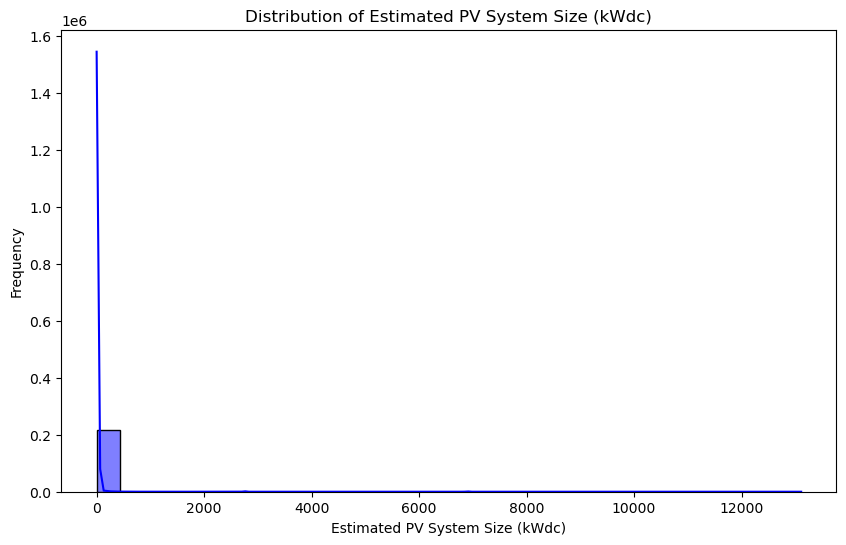

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(df['Estimated PV System Size (kWdc)'], bins=30, kde=True, color ='blue')
plt.title('Distribution of Estimated PV System Size (kWdc)')
plt.xlabel('Estimated PV System Size (kWdc)')
plt.ylabel('Frequency')
plt.show()

#### 2. Top 10 Cities by Number of Projects

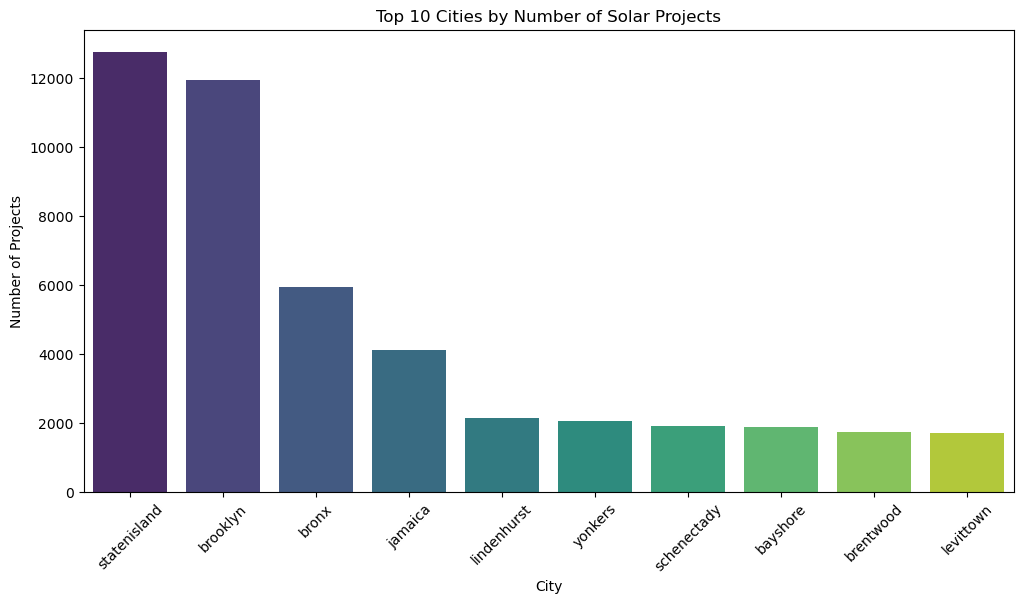

In [118]:
# Group by 'City' and count the number of projects
top_cities = df['City'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Cities by Number of Solar Projects')
plt.xlabel('City')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.show()

#### 3.Annual PV Energy Production by City

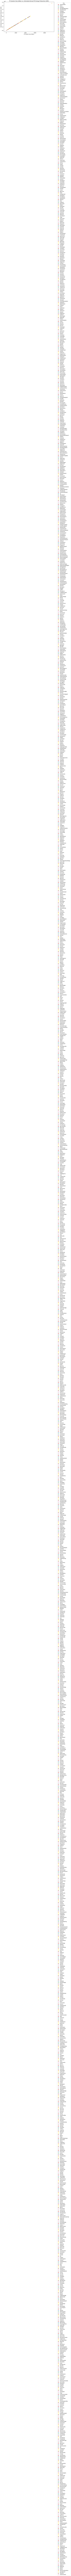

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PV System Size (kWac)', y='Estimated Annual PV Energy Production (kWh)', hue='City', data=df, palette='Set1', alpha=0.6)
plt.title('PV System Size (kWac) vs. Estimated Annual PV Energy Production (kWh)')
plt.xlabel('PV System Size (kWac)')
plt.ylabel('Estimated Annual PV Energy Production (kWh)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 4.Metering Method Distribution

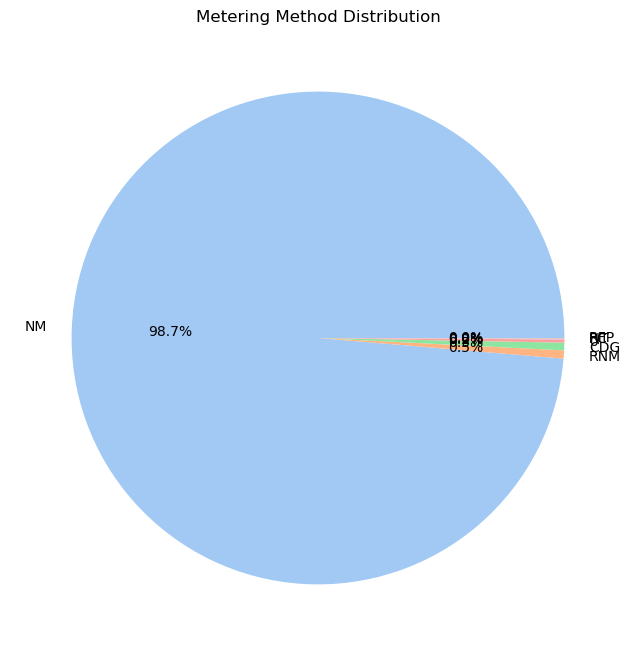

In [123]:
# Calculate the percentage of each Metering Method
metering_method_counts = df['Metering Method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(metering_method_counts, labels=metering_method_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Metering Method Distribution')
plt.show()

# Analysis

To perform a comprehensive analysis, we'd typically start by examining the characteristics of the dataset, exploring the distribution of variables, identifying patterns, and gaining insights that might inform our modeling approach.This, in turn, can lead to more accurate and reliable predictions of  Production Zone Clustering in Machine Learning method.

In [127]:
df

Data Through Date Interconnection Date Utility           City/Town  \
0             12/31/2023           12/29/2023  Con Ed        RichmondHill   
1             12/31/2023           12/29/2023  Con Ed               Bronx   
2             12/31/2023           12/29/2023  Con Ed            Brooklyn   
3             12/31/2023           12/29/2023  Con Ed            Brooklyn   
4             12/31/2023           12/28/2023  Con Ed  SpringfieldGardens   
...                  ...                  ...     ...                 ...   
218052        12/31/2023            2/29/2012   NYSEG              Ithaca   
218053        12/31/2023            9/23/2002     RGE           Rochester   
218054        12/31/2023            9/24/2002     RGE             Ontario   
218055        12/31/2023           12/19/2002     RGE             Ontario   
218056        12/31/2023            9/24/2002     RGE          Friendship   

          County      Zip Metering Method  Estimated PV System Size (kWdc)  \
0         Queens  11418.0              NM                             6.05   
1          Bronx  10473.0              NM                             6.74   
2          Kings  11225.0              NM                             3.05   
3          Kings  11236.0              NM                             5.62   
4         Queens  11413.0              NM                             6.05   
...          ...      ...             ...                              ...   
218052  Tompkins  14850.0              NM                            14.04   
218053    Monroe  14623.0              NM                             2.34   
218054     Wayne  14519.0              NM                             2.34   
218055     Wayne  14519.0              NM                             2.81   
218056  Allegany  14739.0              NM                             2.93   

        PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
0                        5.17                                         7100   
1                        5.76                                         7911   
2                        2.61                                         3585   
3                        4.80                                         6592   
4                        5.17                                         7100   
...                       ...                                          ...   
218052                  12.00                                        16481   
218053                   2.00                                         2747   
218054                   2.00                                         2747   
218055                   2.40                                         3296   
218056                   2.50                                         3433   

        Number of Projects                City  
0                        1        richmondhill  
1                        1               bronx  
2                        1            brooklyn  
3                        1            brooklyn  
4                        1  springfieldgardens  
...                    ...                 ...  
218052                   1              ithaca  
218053                   1           rochester  
218054                   1             ontario  
218055                   1             ontario  
218056                   1          friendship  

[218057 rows x 12 columns]

In [128]:
# check the value count for Utility
df['Utility'].value_counts()

Utility
PSEGLI            85052
Con Ed            64709
National Grid     26400
Central Hudson    15106
O&R               12152
NYSEG             11773
RGE                2865
Name: count, dtype: int64

In [133]:
# Check the Value count for City/Town
df['City/Town'].value_counts()

City/Town
STATENISLAND     6884
BROOKLYN         6164
Brooklyn         5731
StatenIsland     5707
Jamaica          3400
                 ... 
Nissequogue         1
EastLevittown       1
AMES                1
Hamptonbays         1
EastFreetown        1
Name: count, Length: 3003, dtype: int64

In [135]:
# Check the Value count for County
df['County'].value_counts()

County
Suffolk        51668
Nassau         32222
Queens         23010
Richmond       12766
Westchester    12345
               ...  
Seneca           169
Allegany         160
Schuyler         133
Lewis            100
Hamilton          44
Name: count, Length: 62, dtype: int64

In [137]:
# Check the value count for Zip
df['Zip'].value_counts()

Zip
10314.0    2409
10312.0    2279
11757.0    2131
11704.0    1932
11706.0    1887
           ... 
14134.0       1
13848.0       1
12841.0       1
12767.0       1
14520.0       1
Name: count, Length: 1729, dtype: int64

In [139]:
# Check the value count for Metering Method
df['Metering Method'].value_counts()

Metering Method
NM     215146
RNM      1164
CDG      1090
0         458
RC        108
FIT        87
RFP         4
Name: count, dtype: int64

### Season to visualize seasonly performance

In [142]:
# Extracting months from the data to visualize the performance monthly
df['month'] = pd.to_datetime(df['Interconnection Date']).dt.month_name()

In [143]:
# Extracting months from the data to visualize the performance year
df['year'] = pd.to_datetime(df['Interconnection Date']).dt.year

In [146]:
# Defining the season to visualize seasonly performan
def season(month):
    if month in ['December','February', 'January' ]:
        return 'winter'
    elif month in ['May', 'April', 'March']:
        return 'spring'
    elif month in ['August', 'July', 'June']:
        return 'summer'
    else:
        return 'autumn'

In [148]:
#Creating a new column named 'Season'
df['seasons'] = df.apply(lambda x: season(x['month']), axis = 1)

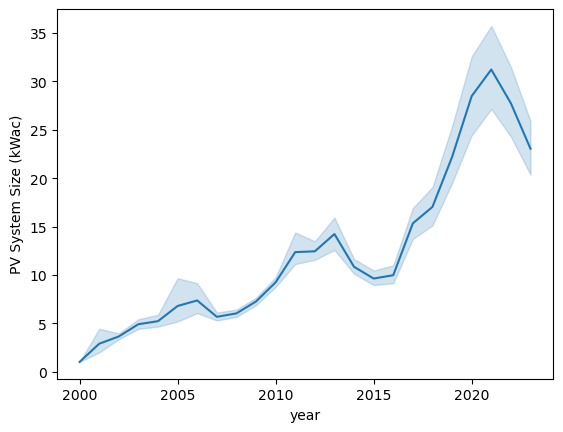

In [150]:
sns.lineplot(x= 'year', y='PV System Size (kWac)', data=df)
plt.show()

# Encoding the Categorical values to numerical data for ML process

In [152]:
from sklearn.preprocessing import LabelEncoder

In [153]:
#Encoding County column
County_le = LabelEncoder()
df['County'] = County_le.fit_transform(df['County'])

In [156]:
# Columns considering for further ML process
df1 = df[['City','County','PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)']]

In [158]:
df1.head()

City  County  PV System Size (kWac)  \
0        richmondhill      40                   5.17   
1               bronx       2                   5.76   
2            brooklyn      23                   2.61   
3            brooklyn      23                   4.80   
4  springfieldgardens      40                   5.17   

   Estimated Annual PV Energy Production (kWh)  
0                                         7100  
1                                         7911  
2                                         3585  
3                                         6592  
4                                         7100

# MinMax Scaler

#### 1.Estimated PV System Size (kWdc)

<Axes: xlabel='Estimated PV System Size (kWdc)'>

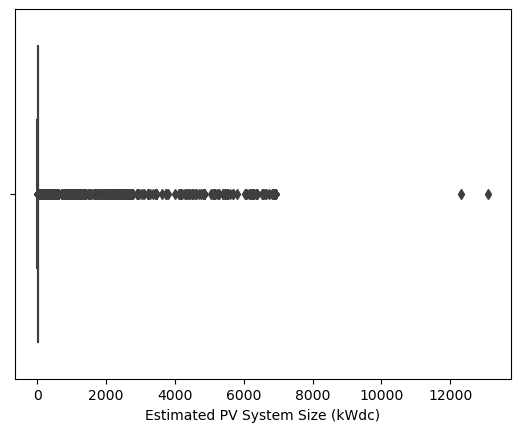

In [100]:
sns.boxplot(x='Estimated PV System Size (kWdc)', data=df)

In [101]:
column_to_cap = 'Estimated PV System Size (kWdc)'

Q1 = df[column_to_cap].quantile(0.25)
Q3 = df[column_to_cap].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[column_to_cap] = df[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

In [102]:
lower_limit

-2.1850000000000014

In [103]:
upper_limit

17.695

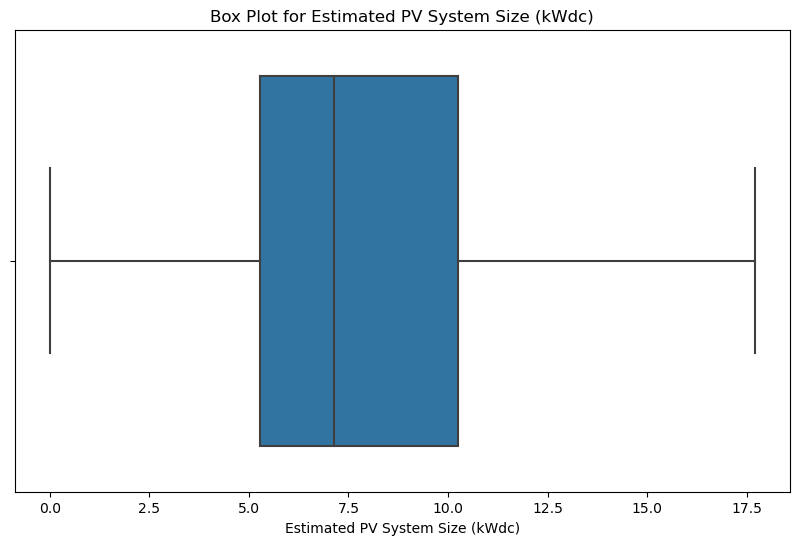

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Estimated PV System Size (kWdc)'])
plt.title('Box Plot for Estimated PV System Size (kWdc)')
plt.show()

#### 2. PV System Size (kWac)

<Axes: xlabel='PV System Size (kWac)'>

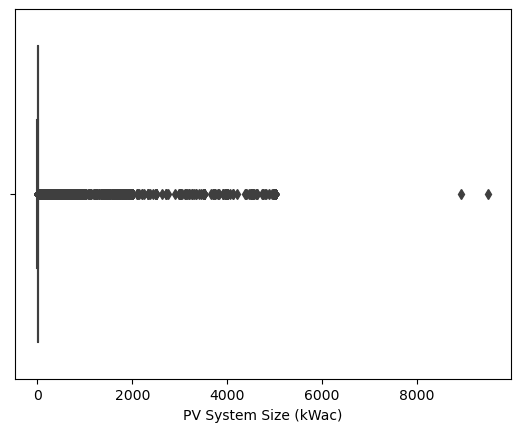

In [106]:
sns.boxplot(x='PV System Size (kWac)', data=df)

In [107]:
column_to_cap = 'PV System Size (kWac)'

Q1 = df[column_to_cap].quantile(0.25)
Q3 = df[column_to_cap].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[column_to_cap] = df[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

In [108]:
lower_limit

-1.875

In [109]:
upper_limit

15.125

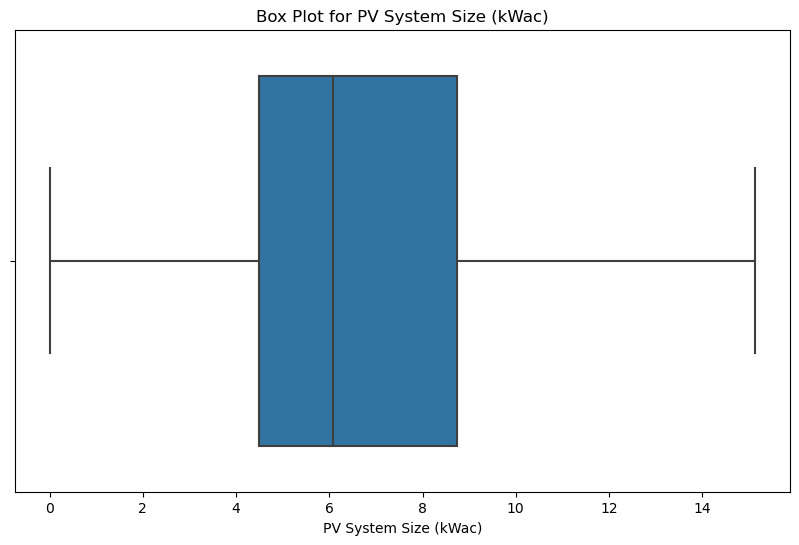

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PV System Size (kWac)'])
plt.title('Box Plot for PV System Size (kWac)')
plt.show()

#### 3. Estimated Annual PV Energy Production (kWh)

<Axes: xlabel='Estimated Annual PV Energy Production (kWh)'>

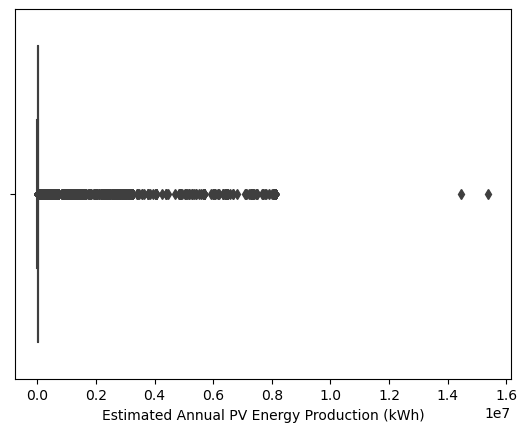

In [112]:
sns.boxplot(x='Estimated Annual PV Energy Production (kWh)', data=df)

In [113]:
olumn_to_cap = 'Estimated Annual PV Energy Production (kWh)'

Q1 = df[column_to_cap].quantile(0.25)
Q3 = df[column_to_cap].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[column_to_cap] = df[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

In [114]:
lower_limit

-1.875

In [115]:
upper_limit

15.125

<Axes: title={'center': 'Histogram of Estimated Annual PV Energy Production (kWh)'}, ylabel='Frequency'>

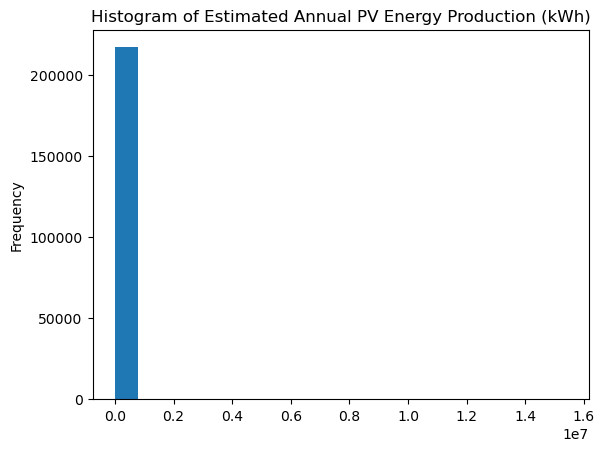

In [116]:
df['Estimated Annual PV Energy Production (kWh)'].plot(kind='hist', bins=20, title='Histogram of Estimated Annual PV Energy Production (kWh)')

# Scaling the data

In [169]:
from sklearn.preprocessing import StandardScaler

In [171]:
ss = StandardScaler()

In [173]:
features = df1.drop(['City'], axis = 1)

In [175]:
scaled_df =pd.DataFrame(ss.fit_transform(features), columns = features.columns)

In [177]:
scaled_df

County  PV System Size (kWac)  \
0       0.161219              -0.071756   
1      -2.354211              -0.068621   
2      -0.964105              -0.085356   
3      -0.964105              -0.073721   
4       0.161219              -0.071756   
...          ...                    ...   
218052  1.087957              -0.035470   
218053 -0.699323              -0.088597   
218054  1.352739              -0.088597   
218055  1.352739              -0.086472   
218056 -2.420407              -0.085941   

        Estimated Annual PV Energy Production (kWh)  
0                                         -0.069072  
1                                         -0.066409  
2                                         -0.080611  
3                                         -0.070739  
4                                         -0.069072  
...                                             ...  
218052                                    -0.038274  
218053                                    -0.083362  
218054                                    -0.083362  
218055                                    -0.081560  
218056                                    -0.081110  

[218057 rows x 3 columns]

# ML Algorithm

### K Mean Clustering

The centroid-based clustering algorithm (i.e. K-Means). Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm.
Here we consider two techniques (Elbow plot and Silhouette score) to decide the optimal value of K to perform the K-means clusteri.ng

a. Optimal Value of K Using Elbow Plot Elbow plot is plotted with the value of K on the x-axis and the WCSS (Within Cluster Sum of Squares) on the y-axis. The value of K corresponding to the elbow point represents the optimal value for K.

In [179]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [128]:
# create several cluster combinations ranging from 1 to 20 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

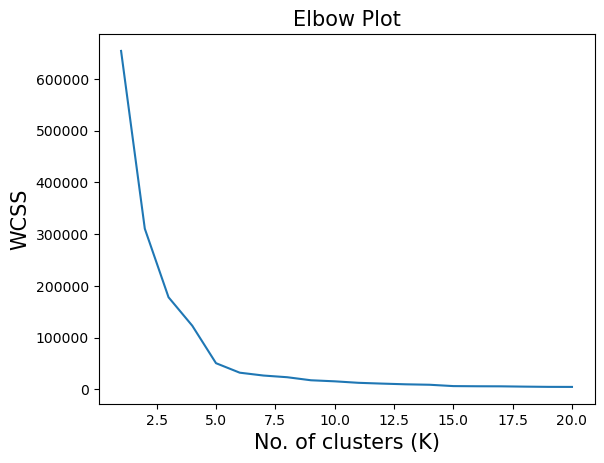

In [129]:
plt.plot(range(1,21), wcss)

plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

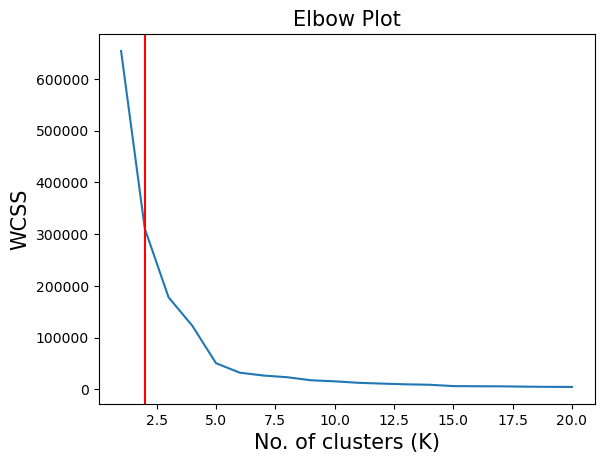

In [130]:
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# plot a vertical line at the elbow
plt.axvline(x = 2, color = 'red')

# display the plot
plt.show()

 Interpretation: We can see that the for K = 2, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 2, the WCSS is decreasing slowly.
Now, let us use the silhouette score method to identify the optimal value of K.

### Optimal Value of K Using Silhouette Score

The Silhouette score can also be used to identify the optimal number of clusters. We plot the Silhouette score for different values of K. The K with the highest Silhouette score represents the optimal value for the number of clusters (K).

In [134]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 42)
    predict = cluster.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, predict, random_state= 42)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.9637705416182508)
For 3 clusters the silhouette score is 0.567006815957277)
For 4 clusters the silhouette score is 0.6152174589100255)
For 5 clusters the silhouette score is 0.6273302209569284)
For 6 clusters the silhouette score is 0.6956729729158939)


The K with the highest Silhouette score represents the optimal value for the number of clusters (K). We can see that the silhouette score is maximum for k = 2 and from the plot, This implies that K = 2 is the optimal value for number of clusters

##### Build the Clusters

Let us build the 5 clusters using K-means clustering.

In [180]:
# build a K-Means model with 5 clusters
new_clusters = KMeans(n_clusters = 2, random_state = 10)
# fit the model
new_clusters.fit(scaled_df)
# append the cluster label for each point in the dataframe ''
df1['cluster'] = new_clusters.labels_

In [184]:
df1.head()

City  County  PV System Size (kWac)  \
0        richmondhill      40                   5.17   
1               bronx       2                   5.76   
2            brooklyn      23                   2.61   
3            brooklyn      23                   4.80   
4  springfieldgardens      40                   5.17   

   Estimated Annual PV Energy Production (kWh)  cluster  
0                                         7100        0  
1                                         7911        0  
2                                         3585        0  
3                                         6592        0  
4                                         7100        0

In [187]:
#checking the size of the cluster
df1.cluster.value_counts()

cluster
0    217741
1       316
Name: count, dtype: int64

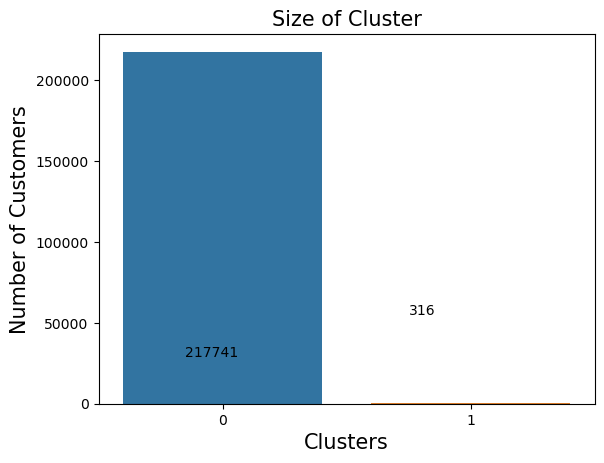

In [190]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df1, x = 'cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.15, y =29000, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.75, y =55000, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])

# display the plot
plt.show()

# Summary statistics for each cluster

#### Cluster 1 :

In [204]:
# size of a cluster 1
len(df1[df1['cluster'] == 0])

217741

In [207]:
## statistical summary of the numerical variables
df1[df1.cluster==0].describe()

County  PV System Size (kWac)  \
count  217741.000000          217741.000000   
mean       37.575872              12.316044   
std        15.101128              79.684828   
min         0.000000               0.010000   
25%        29.000000               4.500000   
50%        40.000000               6.090000   
75%        51.000000               8.700000   
max        61.000000            2200.000000   

       Estimated Annual PV Energy Production (kWh)   cluster  
count                                 2.177410e+05  217741.0  
mean                                  1.783297e+04       0.0  
std                                   1.281750e+05       0.0  
min                                   1.400000e+01       0.0  
25%                                   6.180000e+03       0.0  
50%                                   8.364000e+03       0.0  
75%                                   1.194900e+04       0.0  
max                                   3.563778e+06       0.0

In [210]:
# statistical summary of the categorical variables
df1[df1.cluster==0].describe(include = object)

City
count         217741
unique          1883
top     statenisland
freq           12764

#### Cluster 2:

In [215]:
# size of a cluster 2
len(df1[df1['cluster'] == 1])

316

In [218]:
# statistical summary of the numerical variables
df1[df1.cluster==1].describe()

County  PV System Size (kWac)  \
count  316.000000             316.000000   
mean    29.727848            4401.261646   
std     16.897318             916.895362   
min      0.000000            2250.000000   
25%     15.500000            3900.000000   
50%     27.000000            4988.000000   
75%     44.000000            5000.000000   
max     61.000000            9500.000000   

       Estimated Annual PV Energy Production (kWh)  cluster  
count                                 3.160000e+02    316.0  
mean                                  7.129600e+06      1.0  
std                                   1.485278e+06      0.0  
min                                   3.644773e+06      1.0  
25%                                   6.317607e+06      1.0  
50%                                   8.080057e+06      1.0  
75%                                   8.099496e+06      1.0  
max                                   1.538904e+07      1.0

In [221]:
# statistical summary of the categorical variables
df1[df1.cluster==1].describe(include = object)

City
count         316
unique        189
top     canastota
freq            6

# Conclusion

As per the following analysis done and conducted a clustering analysis for solar energy production zones, we have found that 2 cities, i.e., Staten Island and Brooklyn.This could possibly mean the city/town has favourable condition to plan a solar plant depending on Existing Infrastructure, Unique Geographic Features, Policy and Economic Incentives.However the further implimentations can be done by cross verification and field survey.